In [1]:
from hapke_model import *
from constants import *
from access_data import *
from inference import *

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
sample_spectra = get_data()

In [3]:
def plot_estimated_versus_actual(SID, sample_spectra, m_map, D_map):

    data_wavelengths = get_wavelengths(SID, sample_spectra)
    
    data_reflectance =get_reflectance_spectra(SID, sample_spectra)
    # get_w_mixed_hapke_estimate(m_map, D_map)
    ll = get_log_likelihood(data_reflectance, m_map, D_map)
    print("Log Likelihood: " + str(round(ll, 3)))
    estimated_reflectance = get_r_mixed_hapke_estimate(m_map, D_map)

    fig, axes = plt.subplots(2, 1, constrained_layout=True)
    
    axes[0].plot(data_wavelengths, data_reflectance)
    axes[0].set_title("Actual")
    axes[0].set_ylabel("Reflectance")
    
    axes[1].plot(c_wavelengths, estimated_reflectance)
    axes[1].set_title("Estimated")
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("Reflectance")
    fig.suptitle(sids_names[SID], fontsize=14)


Log Likelihood: -420.292
Log Likelihood: -713.801
Log Likelihood: 356.611


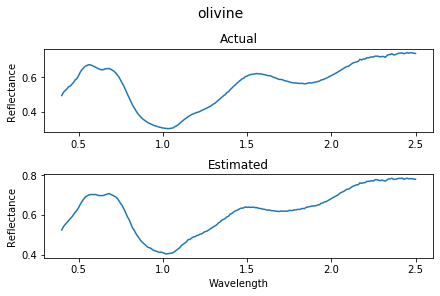

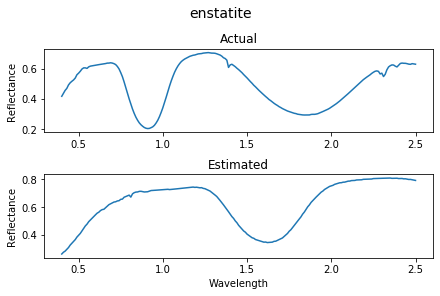

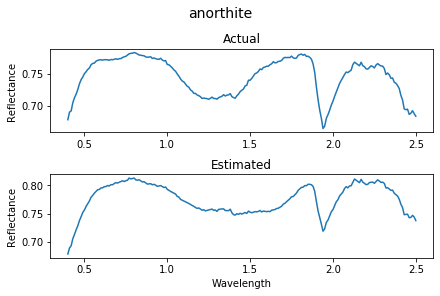

In [4]:
m_map = {pure_olivine_sid : .5,
         pure_enstatite_sid: .05,
         pure_anorthite_sid: .05}
D_map = {pure_olivine_sid : 25,
         pure_enstatite_sid: 30,
         pure_anorthite_sid: 25}

plot_estimated_versus_actual(pure_olivine_sid, sample_spectra, m_map, D_map)


m_map = {pure_olivine_sid : 0.01,
         pure_enstatite_sid: .95,
         pure_anorthite_sid: .01}
plot_estimated_versus_actual(pure_enstatite_sid, sample_spectra, m_map, D_map)

m_map = {pure_olivine_sid : 0.01,
         pure_enstatite_sid: .04,
         pure_anorthite_sid: .95}
plot_estimated_versus_actual(pure_anorthite_sid, sample_spectra, m_map, D_map)